In [57]:
# Bước 1: Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Bước 2: Tải dữ liệu CSV mà đề bài cung cấp, lưu trữ dữ liệu vào dự án,
# viết lệnh để đọc và xem thông tin dữ liệu
df_origin = pd.read_csv(r'C:\Users\thanh\OneDrive\Documents\GitHub\StudyPython\Machine Learning in Business Analysis\Module 1\2. data\USA_Housing.csv')
df = df_origin.copy()
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [59]:
# Xem thông tin tổng quát bằng lệnh
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [60]:
# Xem thông tin tổng quan bằng lệnh
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


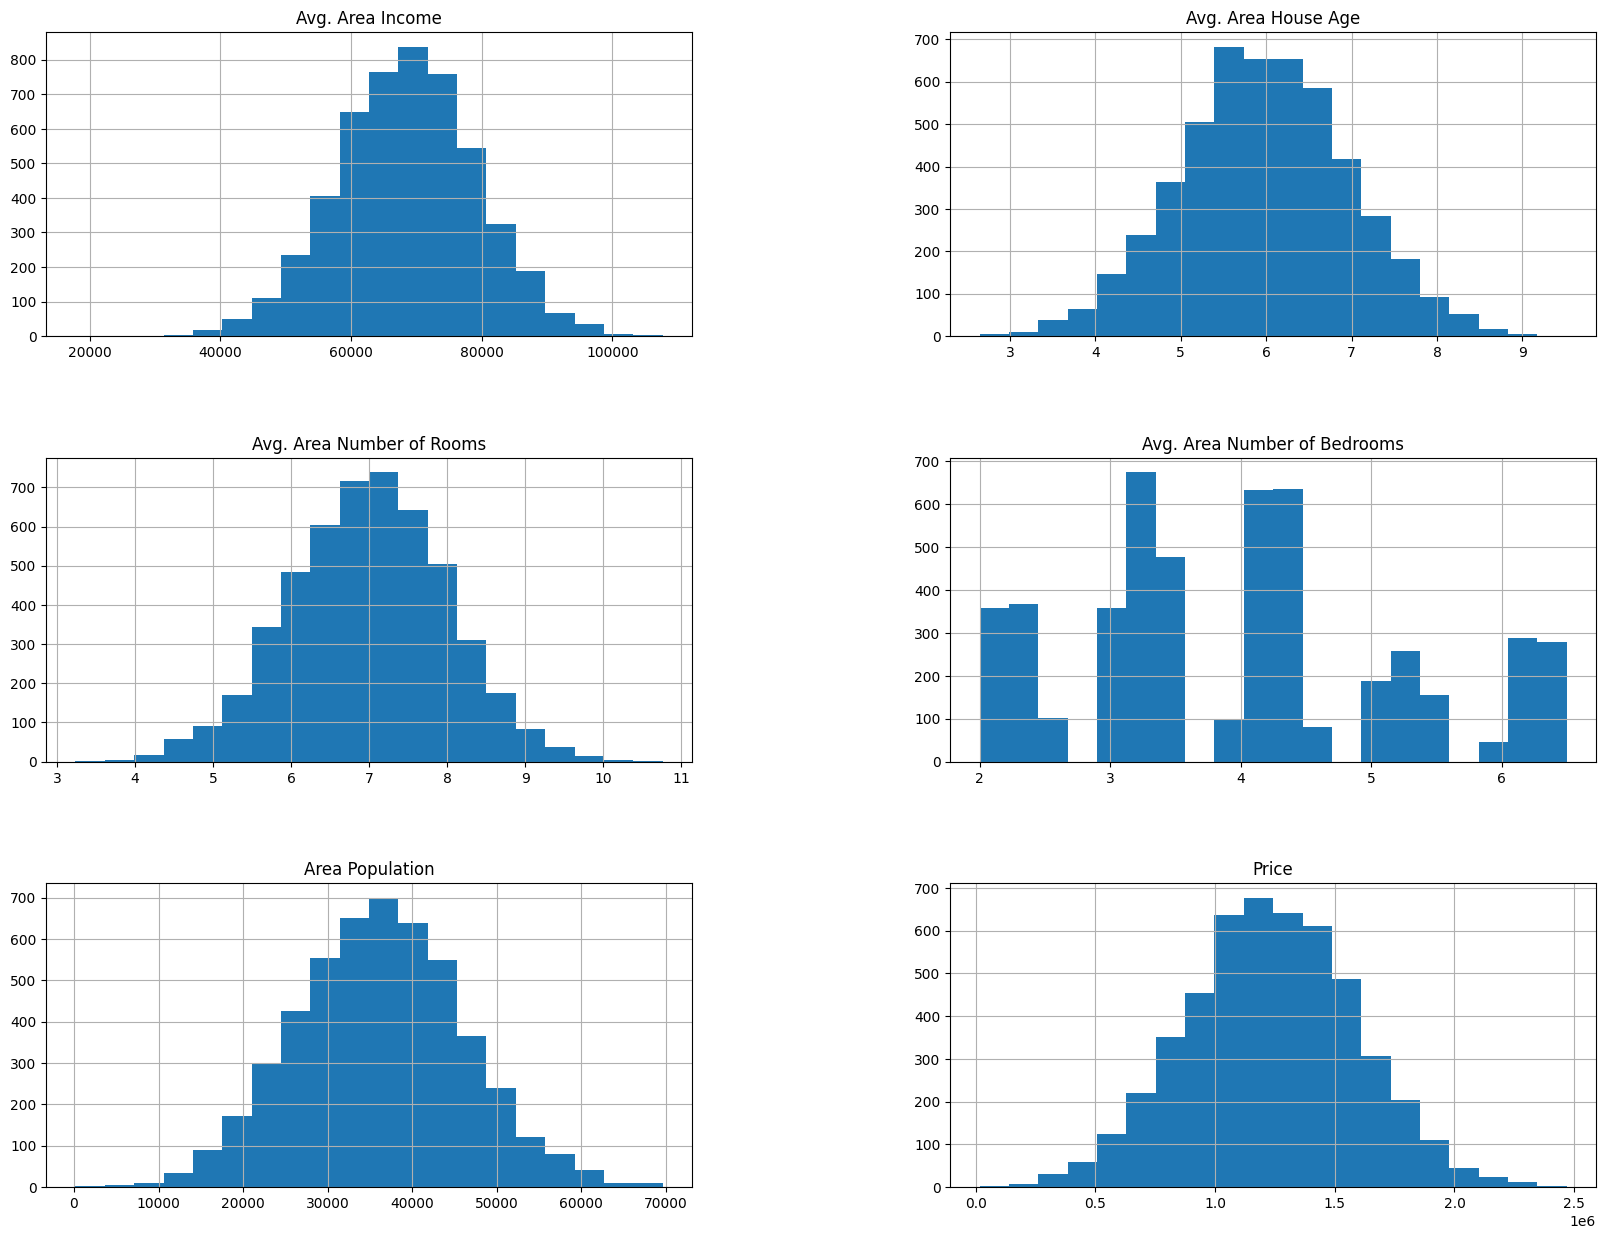

In [61]:
plt.figure(figsize = (20,15))
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

columns = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
           'Avg. Area Number of Bedrooms', 'Area Population', 'Price']

for i, columns in enumerate(columns, 1):
    plt.subplot(3,2, i)
    df[columns].hist(bins = 20)
    plt.title (columns)

plt.show()

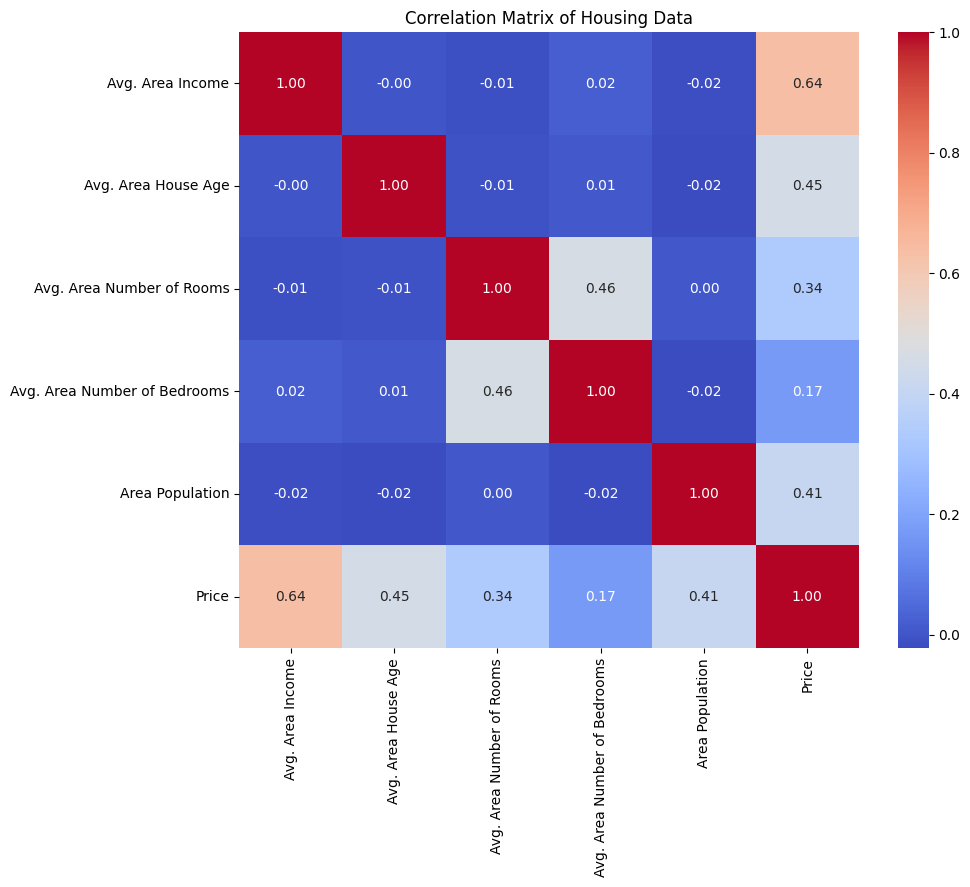

In [62]:
# Vẽ biểu đồ Corr
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix of Housing Data')
plt.show()

Về cơ bản cột Price có tương quan ít nhiều với các cột khác, tức là các cột khác có khả năng ảnh hưởng tới giá của căn nhà.

In [63]:
# Bước 3: Xây dựng và train mô hình dự báo
# Ta cần tách dữ liệu thành một mảng X chứa các đặc trưng cần train ( gọi là các biến độc lập) và một mảng y với biến mục tiêu (biến phụ thuộc), trong trường hợp này thì cột y chính là cột Price
# Cột địa chỉ sẽ được loại bỏ khỏi mô hình vì nó chỉ có thông tin văn bản mà mô hình hồi quy tuyến tính này không sử dụng

# Tách biến mục tiêu (Price) và loại bỏ cột Address để tạo mảng X và y.
X = df.drop(['Price', 'Address'], axis=1)  # Loại bỏ cột Price và Address, giữ lại các đặc trưng độc lập

# Hiển thị kích thước của X và y để xác nhận
X.shape, y.shape


((5000, 5), (5000,))

In [64]:
# Thông thường ta cần chia tập dữ liệu ra làm 2: train và test. Tỉ lệ tùy thuộc vào dữ liệu cũng như kinh nghiệm. Gỉa sử ở đây chúng ta chia theo tỉ lệ 80% và 20%
y = df['Price']  # Tách biến mục tiêu
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
# Tạo và train mô hình
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [66]:
# Bước 4: Sử dụng mô hình
predictions = lm.predict(X_test)

In [67]:
pre1=lm.predict([X_test.iloc[0]])
print("kết quả 1 =",pre1)

kết quả 1 = [1308587.92699759]


c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
pre2=lm.predict([[66774.995817,5.717143,7.795215,4.320000,36788.980327]])
print("kết quả 2 =",pre2)

kết quả 2 = [1256991.45210855]


c:\Users\thanh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
